In [1]:
%load_ext watermark

In [3]:
%watermark -a 'Gopala KR' -v -d

Gopala KR 2018-01-28 

CPython 3.6.3
IPython 6.2.1


# Principal Component Analysis - Standardized Data, Covariance, and Correlation

<br>
<br>

This is a short follow-up to a previous article [Implementing a Principal Component Analysis (PCA) in Python step by step](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html); the purpose of this document is to show that a Principal Component Analysis based on the covariance matrix of the standardized data yields similar results to an PCA using the correlation matrix (the correlation matrix can be defined as the standardized covariance matrix). 


A common application of PCA is to reduce the dimensions of the dataset with minimal loss of information where the entire dataset ($d$ dimensions) is projected onto a new subspace ($k$ dimensions where $k < d$). 
This method of projection is useful in order to reduce the computational costs and the error of parameter estimation ("curse of dimensionality"). The standard PCA approach can be summarized in six simple steps:


1. Compute the covariance matrix of the original or standardized $d$-dimensional dataset $\textbf{X}$ (here: $d = 3$); alternatively, compute the correlation matrix.
2. Eigendecomposition: Compute the eigenvectors and eigenvalues of the covariance matrix (or correlation matrix).
3. Sort the eigenvalues in descending order.
4. Choose the $k$ eigenvectors that correspond to the $k$ largest eigenvalues where $k$ is the number of dimensions of the new feature subspace ($k \le d$). 
5. Construct the projection matrix  $\textbf{W}$ from the $k$ selected eigenvectors.
6. Transform the original dataset $\textbf{X}$ to obtain the $k$ dimensional feature subspace $\textbf{Y}$ ($\textbf{Y} = \textbf{W}^T \cdot \textbf{X}$).


**Whether to standardize the data prior to a PCA on the covariance matrix (or correlation matrix) depends on the measurement scales of the original features. Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data if it was measured on different scales.**

<br>
<br>

## Sections

- [Dataset](#Dataset)
- [PCA Based on the Covariance Matrix of the Raw Data](#PCA-Based-on-the-Covariance-Matrix-of-the-Raw-Data)
- [PCA Based on the Covariance Matrix of the Standardized Data](#PCA-Based-on-the-Covariance-Matrix-of-the-Standardized-Data)
- [PCA Based on the Correlation Matrix](#PCA-Based-on-the-Covariance-Matrix-of-the-Standardized-Data)
- [Results](#Results)

<br>
<br>

## Dataset

The [Iris flower dataset](http://en.wikipedia.org/wiki/Iris_flower_data_set) will be used for this example. The dataset consists of 150 samples with 4 different features that have all been measured in the unit centimeter. For demonstration purposes, the first feature will be converted to inches and the second feature to meters, respectively.

In [4]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

data = load_iris()
X = data.data

# convert features in column 1 from cm to inches
X[:,0] /= 2.54
# convert features in column 2 from cm to meters
X[:,1] /= 100

<br>
<br>

## PCA Based on the Covariance Matrix of the Raw Data

[[back-to-top](#Sections)]

In [5]:
%matplotlib inline

In [6]:
def pca_raw_cov(X):
    # Compute the covariance matrix
    cov_mat = np.cov(X.T)

    # Eigendecomposition of the covariance matrix
    eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

    # Make a list of (eigenvalue, eigenvector) tuples
    # and sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs_cov = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]
    eig_pairs_cov.sort()
    eig_pairs_cov.reverse()

    # Construct the transformation matrix W from the eigenvalues that correspond to
    # the k largest eigenvalues (here: k = 2)
    matrix_w_cov = np.hstack((eig_pairs_cov[0][1].reshape(4,1), eig_pairs_cov[1][1].reshape(4,1)))

    # Transform the data using matrix W
    X_raw_transf = matrix_w_cov.T.dot(X.T).T

    # Plot the data
    plt.scatter(X_raw_transf[:,0], X_raw_transf[:,1])
    plt.title('PCA based on the covariance matrix of the raw data')
    plt.show()

<br>
<br>

## PCA Based on the Covariance Matrix of the Standardized Data

[[back-to-top](#Sections)]

In [7]:
def pca_standardize_cov(X):

    # Standardize data
    X_std = StandardScaler().fit_transform(X)

    # Compute the covariance matrix
    cov_mat = np.cov(X_std.T)

    # Eigendecomposition of the covariance matrix
    eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

    # Make a list of (eigenvalue, eigenvector) tuples
    # and sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs_cov = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]
    eig_pairs_cov.sort()
    eig_pairs_cov.reverse()

    # Construct the transformation matrix W from the eigenvalues that correspond to
    # the k largest eigenvalues (here: k = 2)
    matrix_w_cov = np.hstack((eig_pairs_cov[0][1].reshape(4,1), eig_pairs_cov[1][1].reshape(4,1)))

    # Transform the data using matrix W
    X_std_transf = matrix_w_cov.T.dot(X_std.T).T

    # Plot the data
    plt.scatter(X_std_transf[:,0], X_std_transf[:,1])
    plt.title('PCA based on the covariance matrix after standardizing the data')
    plt.show()

<br>
<br>

## PCA Based on the Correlation Matrix

[[back-to-top](#Sections)]

In [8]:
def pca_cor(X):
    # Compute the correlation matrix
    cor_mat = np.corrcoef(X.T)

    # Eigendecomposition of the correlation matrix
    eig_val_cor, eig_vec_cor = np.linalg.eig(cor_mat)

    # Make a list of (eigenvalue, eigenvector) tuples
    # and sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs_cor = [(np.abs(eig_val_cor[i]), eig_vec_cor[:,i]) for i in range(len(eig_val_cor))]
    eig_pairs_cor.sort()
    eig_pairs_cor.reverse()

    # Construct the transformation matrix W from the eigenvalues that correspond to
    # the k largest eigenvalues (here: k = 2)
    matrix_w_cor = np.hstack((eig_pairs_cor[0][1].reshape(4,1), eig_pairs_cor[1][1].reshape(4,1)))

    # Transform the data using matrix W
    X_transf = matrix_w_cor.T.dot(X.T).T

    # Plot the data
    plt.scatter(X_transf[:,0], X_transf[:,1])
    plt.title('PCA based on the correlation matrix of the raw data')
    plt.show()

<br>
<br>

## Results

[[back-to-top](#Sections)]

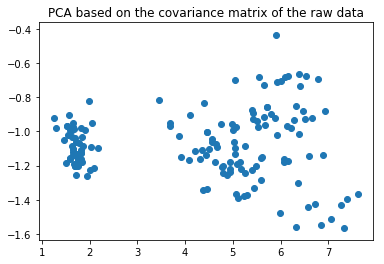

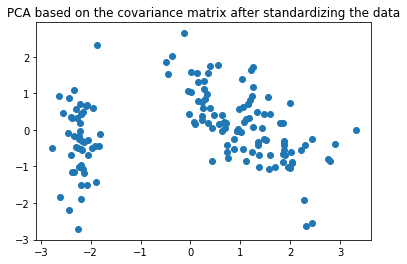

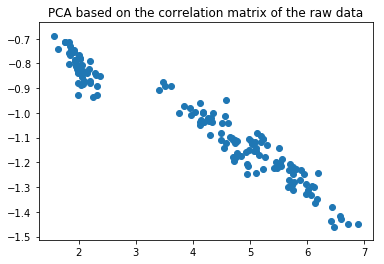

In [9]:
pca_raw_cov(X)
pca_standardize_cov(X)
pca_cor(X)

The plot of the transformed data shows that PCA based on the correlation matrix produces similar results to a PCA based on the covariance matrix of the standardized data.

In [ ]:
test complete; Gopal